In [423]:
import pandas as pd
import numpy as np

In [424]:
# reading movie data and user rating data
movies_df = pd.read_csv('data/movies_metadata.csv',usecols=['id','title'])

rating_df = pd.read_csv('data/ratings_small.csv',usecols=['userId', 'movieId', 'rating'],
dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [425]:
# reading movie data and user rating data
movies_df = pd.read_csv('data/movies_metadata.csv',usecols=['id','title'])

rating_df = pd.read_csv('data/ratings_small.csv',usecols=['userId', 'movieId', 'rating'],
dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [426]:
# drops Nan values
movies_df.dropna(inplace=True)

# defines Dtype of id
movies_df["id"] = movies_df['id'].astype(pd.Int64Dtype())

# renames id to movieId for later merge
movies_df = movies_df.rename(columns={'id' : 'movieId'})

movies_df

,movieId,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II
...,...,...
45461,439050,Subdue
45462,111109,Century of Birthing
45463,67758,Betrayal
45464,227506,Satan Triumphant


In [427]:
rating_df.head()

,userId,movieId,rating
0,1,31,2.500
1,1,1029,3.000
2,1,1061,3.000
3,1,1129,2.000
4,1,1172,4.000


In [428]:
# merges the to dataframes
df = pd.merge(rating_df,movies_df,on='movieId')
df.head()

,userId,movieId,rating,title
0,1,1371,2.500,Rocky III
1,4,1371,4.000,Rocky III
2,7,1371,3.000,Rocky III
3,19,1371,4.000,Rocky III
4,21,1371,3.000,Rocky III


In [429]:
#combine_movie_rating = df.dropna(axis = 0, subset = ['title'])

# groups all of same title, counts all the ratings and remanes ratings to totalRatingCount
movie_ratingCount = (df.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount.head()

,title,totalRatingCount
0,!Women Art Revolution,2
1,'Gator Bait,1
2,'Twas the Night Before Christmas,2
3,...And God Created Woman,1
4,00 Schneider - Jagd auf Nihil Baxter,2


In [430]:
# merges the totalRatingCount on title
rating_with_totalRatingCount = df.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1371,2.500,Rocky III,47
1,4,1371,4.000,Rocky III,47
2,7,1371,3.000,Rocky III,47
3,19,1371,4.000,Rocky III,47
4,21,1371,3.000,Rocky III,47


In [431]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

count   2794.000
mean      16.104
std       31.481
min        1.000
25%        1.000
50%        4.000
75%       15.750
max      324.000
Name: totalRatingCount, dtype: float64


In [432]:
# removes all movies with less then 50 ppl rating them.
popularity_threshold = 10
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.describe()

,userId,movieId,rating,totalRatingCount
count,39675.000,39675.000,39675.000,39675.000
mean,342.765,4412.588,3.600,87.416
std,194.922,12398.346,1.037,72.640
min,1.000,2.000,0.500,10.000
25%,174.000,468.000,3.000,31.000
50%,355.000,1269.000,4.000,64.000
75%,517.000,2454.000,4.000,120.000
max,671.000,111759.000,5.000,324.000


In [433]:
# puts all movie and user in a metrix with ratings
movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
# movie_features_df=rating_popular_movie.pivot_table(index='userId',columns='title',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Items or Less,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2 Days in Paris,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"20,000 Leagues Under the Sea",0.000,0.000,0.000,3.000,0.000,2.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000
24 Hour Party People,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000


In [434]:
movie_features_df.shape

(945, 671)

In [435]:
# from scipy.sparse import csr_matrix

# movie_features_df_matrix = csr_matrix(movie_features_df.values)

# type(movie_features_df_matrix)

In [436]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [437]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [438]:
def optimise_k_means(data, max_k):
    means = [];
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data[[data.columns[1],data.columns[2]]])

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

C:\Users\miemt\AppData\Local\Temp\ipykernel_11984\2992083874.py:7: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  kmeans.fit(data[[data.columns[1],data.columns[2]]])


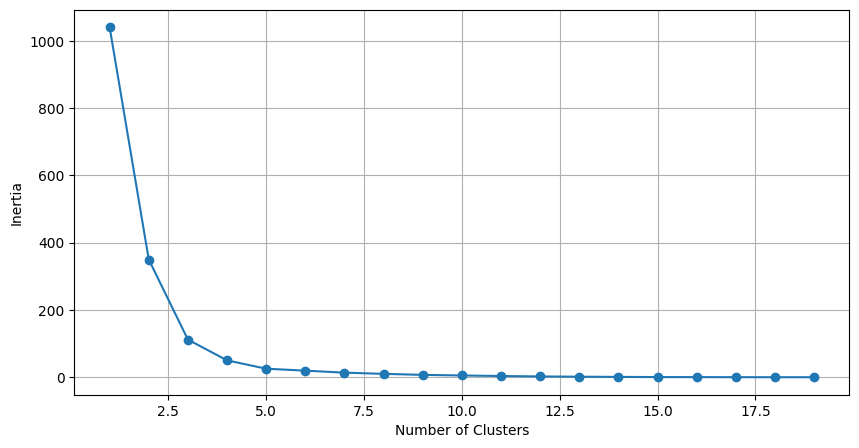

In [439]:
optimise_k_means(movie_features_df,20)

In [440]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(movie_features_df)
# movie_features_df['labels'] = kmeans.labels_

KMeans(n_clusters=5)

In [441]:
#movie_features_df[movie_features_df['labels'] == 4].shape

In [442]:
# randomly picks a movie
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
#query_index = 1

440


In [443]:
# from fuzzywuzzy import process
# idx = process.extractOne("2 Days", movie_features_df.index)

# idx

# movie_features_df.

In [444]:
# movie_features_df.head()
# movie_features_df['labels'] = kmeans.labels_
# movie_features_df.head()

In [445]:
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [446]:
indices

array([[440, 129,  77, 646, 654,  59]], dtype=int64)

In [447]:
movie_features_df.head()
movie_features_df['labels'] = kmeans.labels_

In [448]:


for i in range(0, len(distances.flatten())):
    
    if i == 0:
        print('Recommendations for {0} , cluster {1}:\n'.format(movie_features_df.index[query_index], movie_features_df['labels'][[indices.flatten()[i]]].values[0]))
    else:
        print('{0}: {1}, with distance of {2}: cluster {3}'.
        format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i],movie_features_df['labels'][[indices.flatten()[i]]].values[0]))

Recommendations for Married to the Mob , cluster 1:

1: Blood: The Last Vampire, with distance of 0.4935920238494873: cluster 0
2: Avalon, with distance of 0.5539913177490234: cluster 0
3: Street Kings, with distance of 0.5562143921852112: cluster 1
4: Superstar: The Karen Carpenter Story, with distance of 0.5620939135551453: cluster 0
5: An Unfinished Life, with distance of 0.5627124309539795: cluster 1


In [449]:
indices.flatten()[i]

59

In [450]:
movie_features_df[movie_features_df['labels'] == 3].shape



(14, 672)

In [451]:
movie_features_df.head(1)

userId,1,2,3,4,5,6,7,8,9,10,...,663,664,665,666,667,668,669,670,671,labels
title,,,,,,,,,,,,,,,,,,,,,
10 Items or Less,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4


In [452]:
movie_features_df[movie_features_df['labels'] == 2].shape



(35, 672)

In [453]:
movie_features_df.head(1)

userId,1,2,3,4,5,6,7,8,9,10,...,663,664,665,666,667,668,669,670,671,labels
title,,,,,,,,,,,,,,,,,,,,,
10 Items or Less,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4


In [454]:
movie_features_df.describe()

userId,1,2,3,4,5,6,7,8,9,10,...,663,664,665,666,667,668,669,670,671,labels
count,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000,...,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000,945.000
mean,0.015,0.216,0.094,0.477,0.220,0.099,0.164,0.187,0.102,0.075,...,0.008,0.593,0.675,0.105,0.206,0.041,0.044,0.068,0.197,2.907
std,0.199,0.875,0.581,1.383,0.912,0.589,0.750,0.860,0.633,0.550,...,0.173,1.409,1.412,0.577,0.854,0.429,0.422,0.532,0.885,1.543
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
75%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
max,4.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,...,4.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,4.000


In [455]:
#Grouping passengers by Cluster
movie_features_df_cluster = movie_features_df.groupby(['labels']).mean()
#Count of passengers in each cluster
movie_features_df_cluster['Counts'] = pd.Series(movie_features_df.groupby(['labels']).size())
movie_features_df_cluster

userId,1,2,3,4,5,6,7,8,9,10,...,663,664,665,666,667,668,669,670,671,Counts
labels,,,,,,,,,,,,,,,,,,,,,
0,0.000,0.064,0.197,1.223,0.814,0.383,0.234,0.830,0.245,0.128,...,0.000,2.080,1.606,0.053,0.096,0.138,0.096,0.106,0.989,94
1,0.021,0.241,0.034,0.707,0.126,0.173,0.204,0.052,0.141,0.178,...,0.000,0.045,0.503,0.042,0.325,0.021,0.058,0.052,0.243,191
2,0.000,2.143,0.300,1.343,1.257,0.000,1.086,0.129,0.000,0.171,...,0.000,1.071,2.114,1.571,1.571,0.000,0.000,0.229,0.343,35
3,0.000,1.357,2.286,1.429,0.429,0.000,1.357,3.714,1.857,0.286,...,0.536,3.786,2.929,1.214,1.286,1.357,0.929,1.643,2.500,14
4,0.016,0.095,0.034,0.219,0.093,0.040,0.061,0.052,0.033,0.025,...,0.000,0.435,0.452,0.023,0.083,0.005,0.015,0.021,0.000,611
